In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay


In [20]:
iris=datasets.load_iris()
x=iris.data[:,[0,2]]
y=iris.target

In [34]:
clf1=DecisionTreeClassifier(max_depth=4)
clf2=KNeighborsClassifier(n_neighbors=7)
clf3 =SVC(gamma=0.1, kernel="rbf", probability=True)
eclf=VotingClassifier(estimators=[('dt',clf1),("knn",clf2),("svc",clf3)],voting="hard",weights=[2,1,2])

In [35]:
clf1.fit(x,y)
clf2.fit(x,y)
clf3.fit(x,y)
eclf.fit(x,y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 weights=[2, 1, 2])

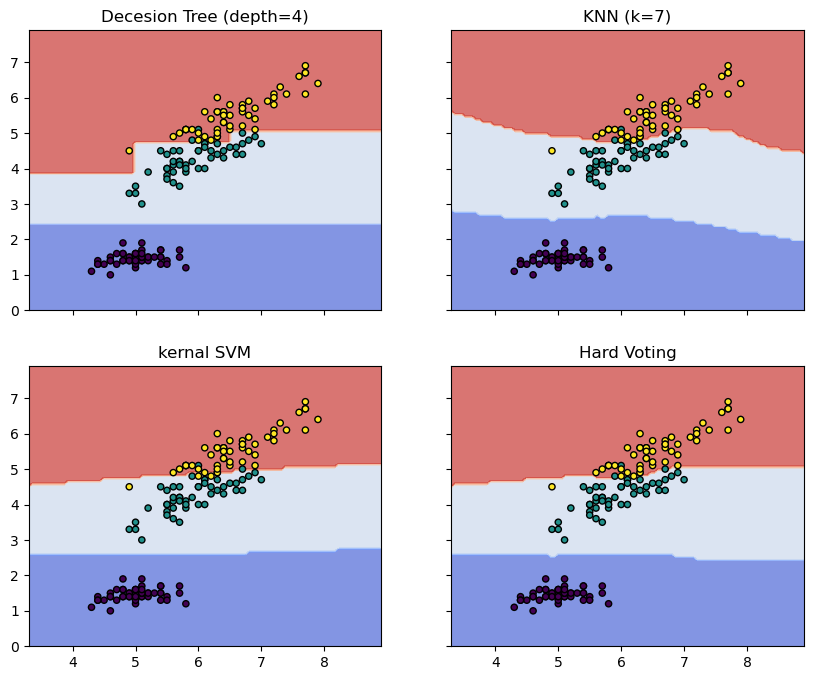

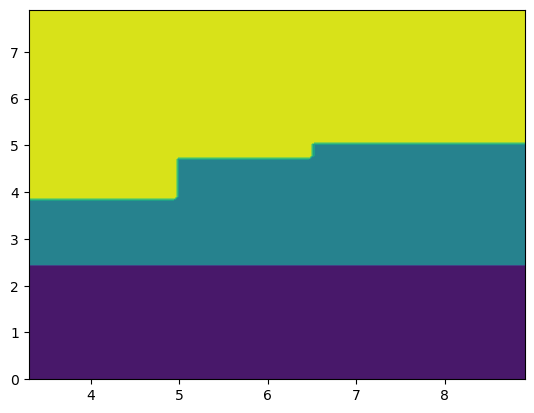

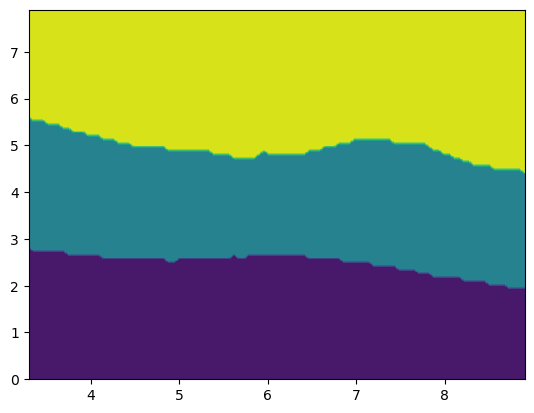

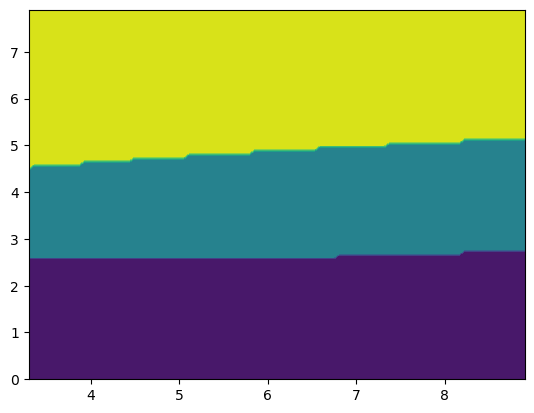

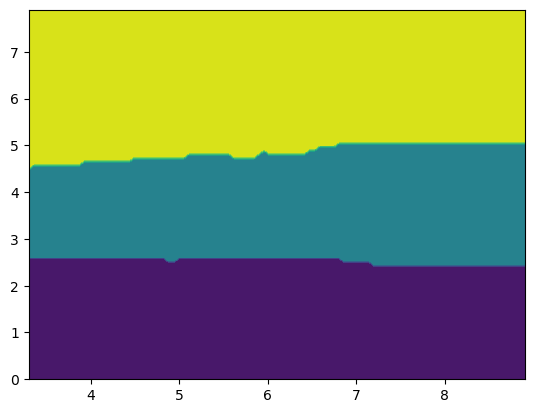

In [38]:
fig, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))
classifiers=[clf1,clf2,clf3,eclf]
titles=['Decesion Tree (depth=4)','KNN (k=7)','kernal SVM',"Hard Voting"]
for idx, (clf, title) in enumerate(zip(classifiers, titles)):
    row = idx // 2
    col = idx % 2
    display = DecisionBoundaryDisplay.from_estimator(clf, x, response_method='predict')
    display.plot(ax=axarr[row, col], cmap=plt.cm.coolwarm, alpha=0.7)
    axarr[row, col].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
    axarr[row, col].set_title(title)

plt.show()
